This Notebook Created By [Moussa JAMOR](https://github.com/JamorMoussa/docs)

Github link of the Notebook in [learn-ComputerVision](https://github.com/JamorMoussa/learn-ComputerVision/blob/main/classic-computer-vision-problems-with-pytorch/Classification_MNIST_With_Neural_Networks.ipynb) Repository

# Classification MNIST using a MLP (Multiple Layer Perceptron)

This notebook is classification MNSIT dataset, which stands for ***Modified National Institute of Standards and Technology***. By, building a sample **Multiple Layer Perceptron**, also called a feed-forward neural network. 

## Import Necessary Libraries

In [87]:
# import libraries: 

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset, random_split

from torchvision import datasets
import torchvision

import matplotlib.pyplot as plt
import numpy as np

from sklearn.metrics import classification_report, accuracy_score

## MNIST Dataset

The **MNIST** dataset of handwritten digits has a training set of 60,000 examples, and a test set of 10,000 examples. It's consist of 28px by 28px gray scall handwritten digits image (0-9).

In this notebook, we'll split the dataset into train and test dataset. The train contains 50000 images, and the test dataset contains 10000 images.

## Load - Visualize - Prepare MNIST Dataset: 

In [4]:
class FlattenTensor:
    def __call__(self, tensor: torch.Tensor) -> torch.Tensor:
        return tensor.view(-1)

    def __repr__(self) -> str:
        return f"{self.__class__.__name__}()"

In [5]:
mnist = datasets.MNIST('./files/', download=False, 
                      transform= torchvision.transforms.Compose([
                          torchvision.transforms.ToTensor(),
                          FlattenTensor()
                      ])
                      )

In [6]:
img, _  = datasets.MNIST('./files/', download=False)[0]

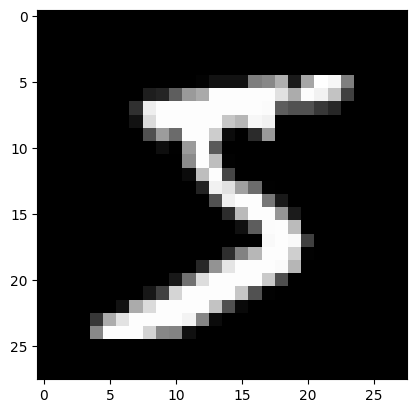

In [7]:
plt.imshow(img, cmap="gray")

## MNIST Description

In [8]:
mnist

Dataset MNIST
    Number of datapoints: 60000
    Root location: ./files/
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
               FlattenTensor()
           )

In [9]:
# The data shape 60000 image and each image is 28x28 pixels.
mnist.data.shape

torch.Size([60000, 28, 28])

In [10]:
# number of classes
mnist.classes

['0 - zero',
 '1 - one',
 '2 - two',
 '3 - three',
 '4 - four',
 '5 - five',
 '6 - six',
 '7 - seven',
 '8 - eight',
 '9 - nine']

## Prepare The Train, Test Dataset

In [11]:
train_data, test_data = random_split(mnist, [50000, 10000])

In [12]:
print("train data size:", len(train_data))

train data size: 50000


In [13]:
print("test data size: ", len(test_data))

test data size:  10000


## Define Train, Test DataLoader

In [23]:
batch_size = 5000

In [24]:
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)

In [72]:
test_loader = DataLoader(test_data, batch_size=10000, shuffle=True)

## Build The MLP Model

### Define MLPClassifier Class

In [111]:
class MLPClassifier(nn.Module):

    def __init__(self, ) -> None:
        super(MLPClassifier, self).__init__()
        
        self.classifier = nn.Sequential(
            nn.Linear(28*28, 64),
            nn.ReLU(),
            nn.Linear(64, 10)
        )

    def forward(self, input: torch.Tensor) -> torch.Tensor:
        return self.classifier(input)

In [112]:
model = MLPClassifier()

### Define a Loss Function, Optimizer

In [113]:
criterion = nn.CrossEntropyLoss()

In [114]:
opt = optim.Adam(model.parameters(), lr=0.001)

## Train Loop

In [115]:
t = 0
for input, label in train_data:

    opt.zero_grad()

    label_pred = model(input)

    loss = criterion(label_pred, torch.tensor(label))
    
    loss.backward()
    
    opt.step()
    
    t+=1

    if t%500==0 or t==1:
        with torch.inference_mode():
            batch = next(iter(test_loader))
            y_true = batch[1]
            y_pred = torch.argmax(model(batch[0]), axis=1)
            score = accuracy_score(y_pred, y_true)
            print(f"Epoch: {t}| Loss: {loss.item()}| Test Acuracy: {score*100:.3}%")

Epoch: 1| Loss: 2.194558620452881| Test Acuracy: 13.5%
Epoch: 500| Loss: 0.09631658345460892| Test Acuracy: 70.6%
Epoch: 1000| Loss: 1.5823265314102173| Test Acuracy: 83.9%
Epoch: 1500| Loss: 0.0670592412352562| Test Acuracy: 84.6%
Epoch: 2000| Loss: 0.1766364723443985| Test Acuracy: 86.9%
Epoch: 2500| Loss: 0.03408091887831688| Test Acuracy: 87.6%
Epoch: 3000| Loss: 0.002914112526923418| Test Acuracy: 88.8%
Epoch: 3500| Loss: 0.05221961438655853| Test Acuracy: 88.2%
Epoch: 4000| Loss: 0.11807502806186676| Test Acuracy: 89.5%
Epoch: 4500| Loss: 0.05490758270025253| Test Acuracy: 89.6%
Epoch: 5000| Loss: 2.711374521255493| Test Acuracy: 89.8%
Epoch: 5500| Loss: 0.5990583896636963| Test Acuracy: 90.5%
Epoch: 6000| Loss: 0.0004829194222111255| Test Acuracy: 90.7%
Epoch: 6500| Loss: 0.0018070096848532557| Test Acuracy: 91.2%
Epoch: 7000| Loss: 0.005613634362816811| Test Acuracy: 89.2%
Epoch: 7500| Loss: 1.4554567337036133| Test Acuracy: 91.1%
Epoch: 8000| Loss: 0.3357464075088501| Test Acu

## Model Evaluation 


In [117]:
from sklearn.metrics import classification_report, accuracy_score

In [124]:
# Train
with torch.inference_mode():
    train , label = next(iter(DataLoader(train_data, batch_size=50000, shuffle=True)))
    label_pred = torch.argmax(model(train), axis=1)
    print(classification_report(label_pred, label))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      4940
           1       0.98      0.97      0.98      5595
           2       0.95      0.96      0.96      4915
           3       0.98      0.89      0.93      5658
           4       0.95      0.96      0.96      4874
           5       0.94      0.94      0.94      4503
           6       0.97      0.99      0.98      4798
           7       0.98      0.96      0.97      5383
           8       0.88      0.98      0.93      4388
           9       0.94      0.95      0.94      4946

    accuracy                           0.96     50000
   macro avg       0.96      0.96      0.96     50000
weighted avg       0.96      0.96      0.96     50000



In [125]:
# Train
with torch.inference_mode():
    test , label = next(iter(DataLoader(test_data, batch_size=10000, shuffle=True)))
    label_pred = torch.argmax(model(test), axis=1)
    print(classification_report(label_pred, label))

              precision    recall  f1-score   support

           0       0.98      0.97      0.97       997
           1       0.98      0.98      0.98      1197
           2       0.96      0.95      0.95      1034
           3       0.97      0.88      0.92      1110
           4       0.95      0.95      0.95       947
           5       0.94      0.94      0.94       908
           6       0.96      0.98      0.97      1004
           7       0.97      0.95      0.96      1027
           8       0.86      0.97      0.91       810
           9       0.92      0.94      0.93       966

    accuracy                           0.95     10000
   macro avg       0.95      0.95      0.95     10000
weighted avg       0.95      0.95      0.95     10000



## References

- Solving MNIST using PyTorch on [https://www.kaggle.com/code/geekysaint/solving-mnist-using-pytorch](https://www.kaggle.com/code/geekysaint/solving-mnist-using-pytorch)